Text(86.96115376276704, 0.5, 'Latitude')

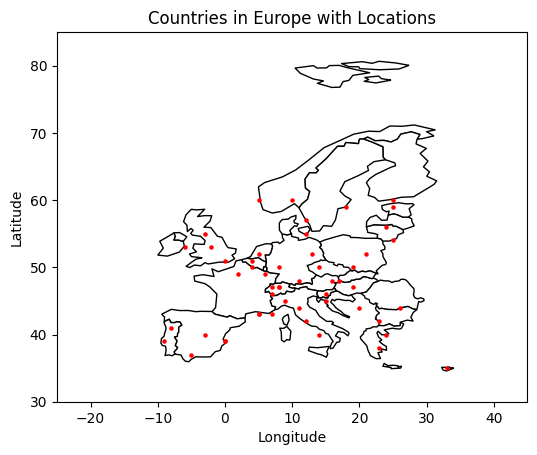

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('Examples\\xy.csv', delimiter=',')

 
# df = pd.read_csv('xy.csv', delimiter=';')
# Replace commas with periods in Longitude and Latitude columns
# df['Longitude'] = df['Longitude'].str.replace(',', '.').astype(float)
# df['Latitude'] = df['Latitude'].str.replace(',', '.').astype(float)
# Create a GeoDataFrame with the geometry column
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))


# Load the Natural Earth low-res dataset
world_data = gpd.read_file("geopandas\\ne_110m_admin_0_countries.shp")

# Get the updated list of unique countries
countrys = df_geo['Country'].unique()

# Check for intersection with the 'ADMIN' column for country names
matched_countries = world_data[world_data['ADMIN'].isin(countrys)]

# Create the plot



28
24
[0, 1, 3, 9, 10, 11, 14, 17, 18, 18, 19, 28, 29, 32, 32, 33, 34, 35, 36, 36, 38, 39, 40, 42, 44, 45, 47, 48]
[2, 4, 5, 6, 7, 8, 12, 13, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 37, 41, 43, 46]
[['Oslo', 10, 60], ['Bergen', 5, 60], ['Edinburgh', -3, 55], ['Manchester', -2, 53], ['Dublin', -6, 53], ['Amsterdam', 5, 52], ['Antwerp', 4, 51], ['London', 0, 51], ['Frankfurt', 8, 50], ['Brussels', 4, 50], ['Luxembourg City', 6, 49], ['Paris', 2, 49], ['Munich', 11, 48], ['Zurich', 8, 47], ['Zurich', 8, 47], ['Basel', 7, 47], ['Bern', 7, 46], ['Milan', 9, 45], ['Bologna', 11, 44], ['Monaco', 7, 43], ['Marseille', 5, 43], ['Marseille', 5, 43], ['Porto', -8, 41], ['Madrid', -3, 40], ['Valencia', 0, 39], ['Valencia', 0, 39], ['Lisbon', -9, 39], ['Seville', -5, 37], ['Nicosia', 33, 35], ['Athens', 23, 38], ['Naples', 14, 40], ['Thessaloniki', 24, 40], ['Rome', 12, 42], ['Sofia', 23, 42], ['Belgrade', 20, 44], ['Bucharest', 26, 44], ['Zagreb', 15, 45], ['Ljubljana', 15, 46], ['Budapest

Text(86.96115376276704, 0.5, 'Latitude')

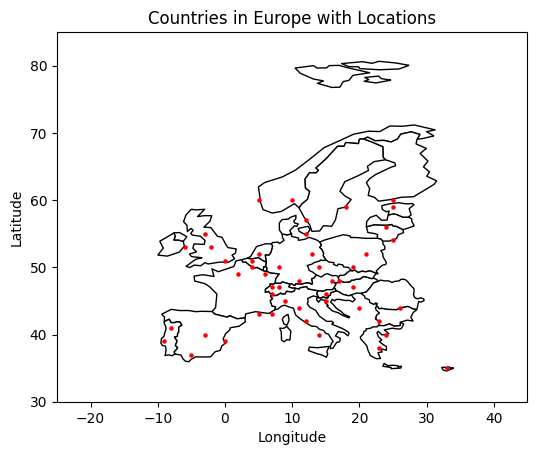

In [78]:
from shapely.geometry import LineString

route = []

city_list = list(df_geo['City'])

# Check for duplicates in the 'City' column of df_geo
duplicates = df_geo[df_geo['City'].duplicated(keep=False)]  # This will return all duplicate entries

if not duplicates.empty:  
    # Remove the second encounter of duplicates (keep the first occurrence)
    df_geo = df_geo.drop_duplicates(subset='City', keep='first').reset_index(drop=True)

for i in range(len(df)):
   route.append([df['City'][i], df['Longitude'][i], df['Latitude'][i]])
  
middle = (df['Longitude'].max() + df['Longitude'].min()) / 2

left_part = []
right_part = []
for i in range(len(route)):
    if route[i][1] < middle:
        left_part.append(route[i])
    else:
        right_part.append(route[i])

left_part = sorted(left_part, key=lambda x: (-x[2], -x[1]))

right_part = sorted(right_part, key=lambda x: (x[2], x[1]))

print(len(left_part))
print(len(right_part))

print(sorted([city_list.index(city[0]) for city in left_part]))
print(sorted([city_list.index(city[0]) for city in right_part]))

heuristic_route = []
for i in range(len(left_part)):
    heuristic_route.append(left_part[i])
for i in range(len(right_part)):
    heuristic_route.append(right_part[i])

print(heuristic_route)

heuristic_route_indices = [city_list.index(city[0]) for city in heuristic_route]




axis = matched_countries.plot(color='white', edgecolor='black')

# Plot your GeoDataFrame on top of the map
df_geo.plot(ax=axis, color='red', markersize=5)

# Set the limits of the plot to include the UK
plt.xlim(-25, 45)  # Set the longitude limits
plt.ylim(30, 85)   # Set the latitude limits

# Optional: Add titles or labels
plt.title('Countries in Europe with Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Loop through the route and plot the lines with the corresponding color
# for i in range(len(heuristic_route)):

#     # Get the coordinates for the two cities
#     start_coords = (heuristic_route[i][1], heuristic_route[i][2])
#     end_coords = (heuristic_route[(i+1)%len(heuristic_route)][1], heuristic_route[(i+1)%len(heuristic_route)][2])

#     # Create a LineString for the route and plot it with the transport color

#     line = LineString([start_coords, end_coords])
#     gpd.GeoSeries([line]).plot(ax=axis, linewidth=2)
     
# # Show the plot
# plt.show()


